In [1]:
from Py6S import *
import numpy as np

In [2]:
# Ocean parameters
wavelength = 2.2
wind_speed = 35
wind_direction = 0
salinity = 34.3
pigmentation = 0.3

# Set up the solar zenith angle
solar_zenith = 45
solar_azimuth = 0

outgoing_zeniths = np.arange(0, 90, 1)
outgoing_azimuth = 180

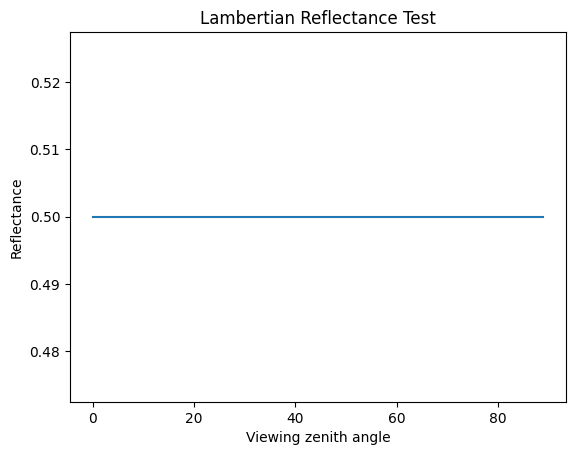

In [3]:
# SixS Lambertian tet
test = SixS()
test.aero_profile = AeroProfile.PredefinedType(AeroProfile.NoAerosols)
test.atmos_profile = AtmosProfile.PredefinedType(AtmosProfile.NoGaseousAbsorption)
test.ground_reflectance = GroundReflectance.HomogeneousLambertian(0.5)
test.wavelength = Wavelength(wavelength)

reflectances = {}

# Run simulations for every viewing zenith
for viewing_zenith in outgoing_zeniths:
    test.geometry = Geometry.User()
    test.geometry.solar_z = solar_zenith
    test.geometry.solar_a = solar_azimuth
    test.geometry.view_z = viewing_zenith
    test.geometry.view_a = outgoing_azimuth
    test.run()

    reflectance = test.outputs.values['apparent_reflectance']
    reflectances[viewing_zenith] = reflectance

# Plot the results
import matplotlib.pyplot as plt

visualization_index = 0

plt.plot(outgoing_zeniths, reflectances.values())

plt.xlabel('Viewing zenith angle')
plt.ylabel('Reflectance')
plt.title('Lambertian Reflectance Test')
plt.show()

In [4]:
# Creating a test bed for ocean reflectance in 6s
s = SixS()
s.aero_profile = AeroProfile.PredefinedType(AeroProfile.NoAerosols)
s.atmos_profile = AtmosProfile.PredefinedType(AtmosProfile.NoGaseousAbsorption)
s.ground_reflectance = GroundReflectance.HomogeneousOcean(wind_speed, wind_direction, salinity, pigmentation)
s.wavelength = Wavelength(wavelength)

In [5]:
results = {}
total_reflectance = {}
foam_percentages = {}
glint_percentages = {}
water_percentages = {}
idx = 0
max_idx = len(outgoing_zeniths)

# Run simulations for every viewing zenith
for viewing_zenith in outgoing_zeniths:
    s.geometry = Geometry.User()
    s.geometry.solar_z = solar_zenith
    s.geometry.solar_a = solar_azimuth
    s.geometry.view_z = viewing_zenith
    s.geometry.view_a = outgoing_azimuth
    s.run()

    foam = s.outputs.values['water_component_foam']
    print(f"Foam: {foam}")
    glint = s.outputs.values['water_component_glint']
    water = s.outputs.values['water_component_water']
    total = foam + glint + water
    foam_percent = foam / total
    glint_percent = glint / total
    water_percent = water / total
    results[viewing_zenith] = [foam, glint, water]
    total_reflectance[viewing_zenith] = total
    foam_percentages[viewing_zenith] = foam_percent
    glint_percentages[viewing_zenith] = glint_percent
    water_percentages[viewing_zenith] = water_percent

    idx += 1
    print(f"Completed {idx}/{max_idx}")

Foam: 0.05222
Completed 1/90
Foam: 0.05222
Completed 2/90
Foam: 0.05222
Completed 3/90
Foam: 0.05222
Completed 4/90
Foam: 0.05222
Completed 5/90
Foam: 0.05222
Completed 6/90
Foam: 0.05222
Completed 7/90
Foam: 0.05222
Completed 8/90
Foam: 0.05222
Completed 9/90
Foam: 0.05222
Completed 10/90
Foam: 0.05222
Completed 11/90
Foam: 0.05222
Completed 12/90
Foam: 0.05222
Completed 13/90
Foam: 0.05222
Completed 14/90
Foam: 0.05222
Completed 15/90
Foam: 0.05222
Completed 16/90
Foam: 0.05222
Completed 17/90
Foam: 0.05222
Completed 18/90
Foam: 0.05222
Completed 19/90
Foam: 0.05222
Completed 20/90
Foam: 0.05222
Completed 21/90
Foam: 0.05222
Completed 22/90
Foam: 0.05222
Completed 23/90
Foam: 0.05222
Completed 24/90
Foam: 0.05222
Completed 25/90
Foam: 0.05222
Completed 26/90
Foam: 0.05222
Completed 27/90
Foam: 0.05222
Completed 28/90
Foam: 0.05222
Completed 29/90
Foam: 0.05222
Completed 30/90
Foam: 0.05222
Completed 31/90
Foam: 0.05222
Completed 32/90
Foam: 0.05222
Completed 33/90
Foam: 0.05222
Compl

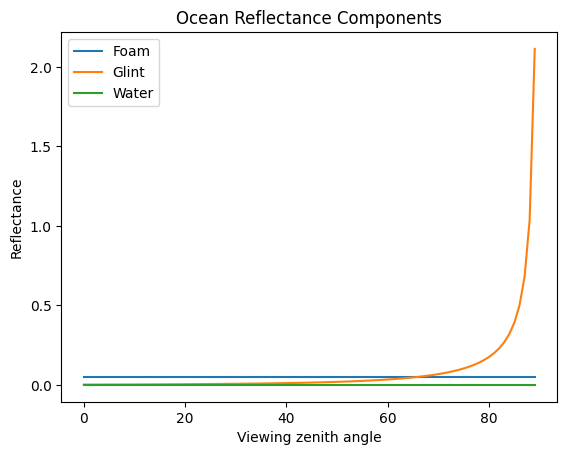

In [6]:
# Plot the results
import matplotlib.pyplot as plt

visualization_index = 0

plt.plot(outgoing_zeniths, [results[zenith] for zenith in outgoing_zeniths])

plt.xlabel('Viewing zenith angle')
plt.ylabel('Reflectance')
plt.title('Ocean Reflectance Components')
plt.legend(['Foam', 'Glint', 'Water', 'Total'])
plt.show()

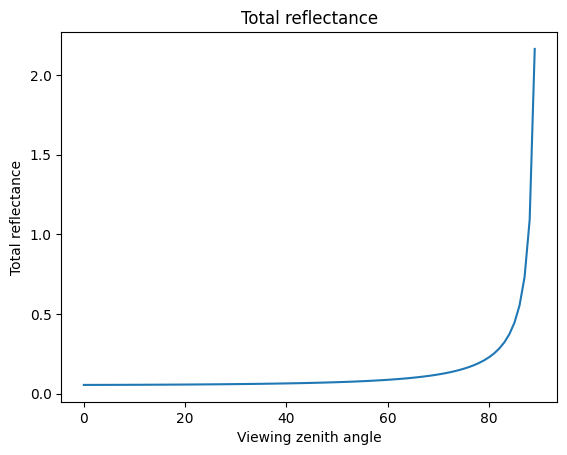

In [7]:
# Plot the total reflectance
plt.plot(outgoing_zeniths, [total_reflectance[zenith] for zenith in outgoing_zeniths])

plt.xlabel('Viewing zenith angle')
plt.ylabel('Total reflectance')
plt.title('Total reflectance')
plt.show()

In [8]:
foam_values = [results[zenith][0] for zenith in outgoing_zeniths]
glint_values = [results[zenith][1] for zenith in outgoing_zeniths]
water_values = [results[zenith][2] for zenith in outgoing_zeniths]

# Component Diagnostic
print(f'Foam:')
print(f'    Min: {np.min(foam_values)}')
print(f'    Max: {np.max(foam_values)}')
print(f'    Mean: {np.mean(foam_values)}')

print(f'Glint:')
print(f'    Min: {np.min(glint_values)}')
print(f'    Max: {np.max(glint_values)}')
print(f'    Mean: {np.mean(glint_values)}')

print(f'Underlight:')
print(f'    Min: {np.min(water_values)}')
print(f'    Max: {np.max(water_values)}')
print(f'    Mean: {np.mean(water_values)}')

Foam:
    Min: 0.05222
    Max: 0.05222
    Mean: 0.05222000000000001
Glint:
    Min: 0.00209
    Max: 2.11272
    Mean: 0.0893718888888889
Underlight:
    Min: 0.0
    Max: 0.0
    Mean: 0.0


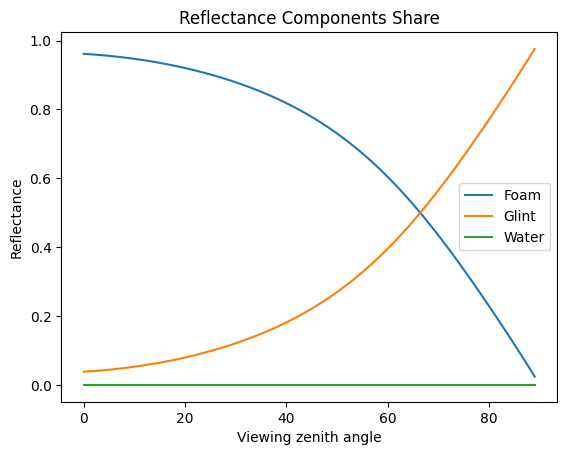

In [9]:
# Plot the percentages
plt.plot(outgoing_zeniths, [foam_percentages[zenith] for zenith in outgoing_zeniths])
plt.plot(outgoing_zeniths, [glint_percentages[zenith] for zenith in outgoing_zeniths])
plt.plot(outgoing_zeniths, [water_percentages[zenith] for zenith in outgoing_zeniths])

plt.xlabel('Viewing zenith angle')
plt.ylabel('Reflectance')
plt.title('Reflectance Components Share')
plt.legend(['Foam', 'Glint', 'Water'])
plt.show()

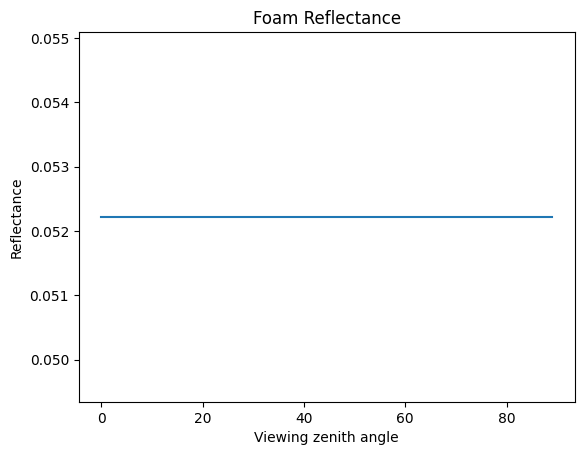

In [10]:
# Plot foam
plt.plot(outgoing_zeniths, [results[zenith][0] for zenith in outgoing_zeniths])

plt.xlabel('Viewing zenith angle')
plt.ylabel('Reflectance')
plt.title('Foam Reflectance')
plt.show()